# scikit-learn 中的SVM

- 和 kNN 一样，要做数据标准化处理
- 涉及距离

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# 准备数据
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

X = X[y<2, :2]
y = y[y<2]

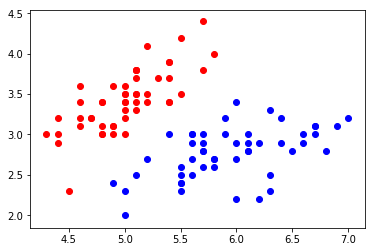

In [18]:
plt.scatter(X[y==0, 0], X[y==0, 1], color="r")
plt.scatter(X[y==1, 0], X[y==1, 1], color="b")

In [21]:
# 正则化
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(X)
X_std = std_scaler.transform(X)

In [22]:
# SVM
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1e9)
svc.fit(X_std, y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [27]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(1, -1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predic = model.predict(X_new)
    zz = y_predic.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF590', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

D:\appCommon\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


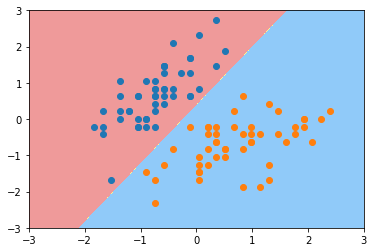

In [29]:
plot_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_std[y==0, 0], X_std[y==0, 1])
plt.scatter(X_std[y==1, 0], X_std[y==1, 1])

In [30]:
svc2 = LinearSVC(C=0.01)
svc2.fit(X_std, y)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

D:\appCommon\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


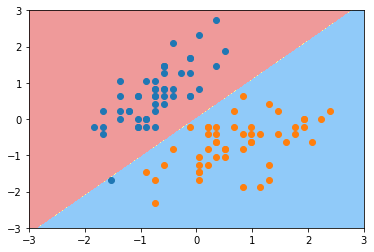

In [32]:
plot_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_std[y==0, 0], X_std[y==0, 1])
plt.scatter(X_std[y==1, 0], X_std[y==1, 1])

- 可以看到，C 变小，有一个点被错误的分类了

In [34]:
svc.coef_

array([[ 4.03237102, -2.50699383]])

In [35]:
svc.intercept_

array([0.92732923])

In [38]:
def plot_svc_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(1, -1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predic = model.predict(X_new)
    zz = y_predic.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF590', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
    
    w = model.coef_[0]
    b = model.intercept_[0]
    
    # w0 * x0 + w1 * x1 + b = 0
    # => x1 = -w0/(w1 * x0 - b/w1)
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/w[1] * plot_x - b/w[1] + 1/w[1]
    down_y = -w[0]/w[1] * plot_x - b/w[1] - 1/w[1]    
    
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    
    plt.plot(plot_x[up_index], up_y[up_index], color='black')
    plt.plot(plot_x[down_index], down_y[down_index], color='black')    

D:\appCommon\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


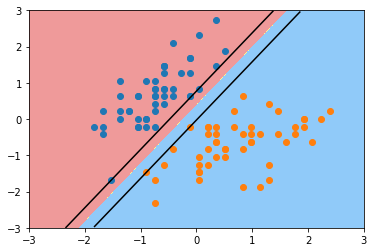

In [39]:
plot_svc_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_std[y==0, 0], X_std[y==0, 1])
plt.scatter(X_std[y==1, 0], X_std[y==1, 1])

D:\appCommon\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


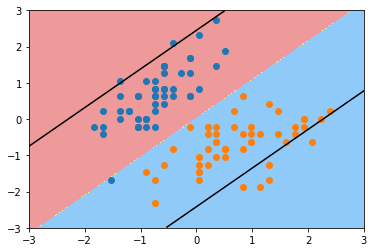

In [40]:
plot_svc_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_std[y==0, 0], X_std[y==0, 1])
plt.scatter(X_std[y==1, 0], X_std[y==1, 1])